In [1]:
import os

In [10]:
from src.model import Model
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
model = Model()
# test_model.loadmodel(path=args.model)
# test_model.test(img_path=args.data)

In [8]:
model.loadmodel("./models/model.hdf5")

In [9]:
mapping = ['0', '1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

Image shape (28, 28, 3)


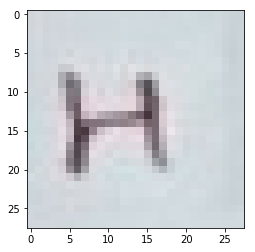

In [48]:
img_path = "./data/test/h.jpg"
image = cv2.imread(img_path)
image = cv2.resize(image, (28, 28),interpolation=cv2.INTER_CUBIC)
print("Image shape {}".format(image.shape))
plt.imshow(image)

(28, 28)


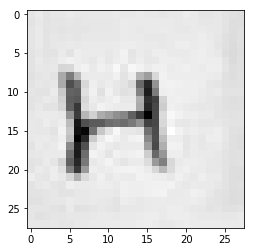

In [55]:
# grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray,cmap="gray")
plt.show()

(28, 28)


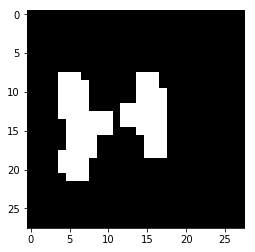

In [57]:
# binary
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((3, 3), np.uint8)
# dilation
pred_img = cv2.dilate(thresh, kernel, iterations=1)
print(pred_img.shape)
plt.imshow(pred_img,cmap="gray")
plt.show()

(28, 28)


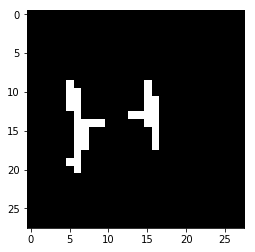

In [58]:
#erode
pred_img = cv2.erode(pred_img, kernel, iterations=1)
print(pred_img.shape)
plt.imshow(pred_img,cmap="gray")
plt.show()

In [53]:
pred_img = pred_img/255.0
pred_test_img = pred_img
pred_test_img = pred_test_img.reshape(1,784)
prediction = mapping[np.argmax(model.model.predict(pred_test_img), axis=1)[0]]
print("Predicted Value : {}".format(prediction))

Predicted Value : W


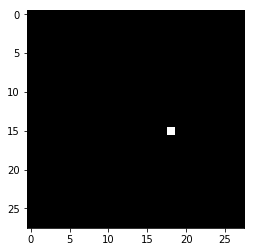

In [19]:
img_path = "./data/test/h.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img, (28, 28),interpolation=cv2.INTER_CUBIC)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

pxmin = np.min(img)
pxmax = np.max(img)
imgContrast = (img - pxmin) / (pxmax - pxmin) * 255

plt.imshow(imgContrast,cmap="gray")

# increase line width
# kernel = np.ones((3, 3), np.uint8)
# imgMorph = cv2.erode(imgContrast, kernel, iterations = 1)

# print(imgMorph.shape)
# plt.imshow(imgMorph,cmap="gray")